In [104]:
from TimeTagger import FileReader
import numpy as np
import easygui
import pandas as pd
import matplotlib.pyplot as plt



We know that H and V got swapped in BOB so I must correct for it in code. 

In [26]:
#GLOBAL DEFINITIONS
aH = 5
aV = 6
bH = 1
bV = 2
cH = 3
cV = 4

H=0
V=1

In [27]:
#folder = r'C:\Data\\'
#folder = "/media/tanvir/SpooqyLab/Table_Top_Demo/1stOct2020"
#folder = "./test"
#folder = "/home/tanvir/work/Programming/gProj/Satellite_QKD/data_source"
#folder = "/home/tanvir/work/Programming/gProj/qkd-table-top-v2/qutools"
#folder = "/home/tanvir/work/Programming/gProj/qkd-table-top-v2/test"
#folder = "/home/tanvir/work/Programming/gProj/qkd-table-top-v2/swabian/newmatch11Jun21"
folder = "./VerifiableRNG_Data"
#file = '2.97mW_1.1.ttbin'
#file = "onlyB.1.ttbin"
#file = "dark1.ttbin"
#file = "3_88mW00dB.1.ttbin"
file ="logSwabian20220216-1748.ttbin"
filepath = folder + '/' + file

#filepath = easygui.fileopenbox(default = folder)






In [28]:
def loadSwabianTimeStamps(fileIn, t = np.inf):
    
        file_reader = FileReader(fileIn)
        stamps = []
        channel = []
        
        
        while file_reader.hasData():
            n_events = 100000; # Number of events to read at once
            #n_events = 400000; # Number of events to read at once
            
            # Read at most n_events.
            data = file_reader.getData(n_events);  # data is an instance of TimeTagStreamBuffer

            channelTmp = data.getChannels()
            stampsTmp = data.getTimestamps()
          #  overflow_types = data.getEventTypes()   # TimeTag = 0, Error = 1, OverflowBegin = 2, OverflowEnd = 3, MissedEvents = 4
          #  missed_events = data.getMissedEvents()
            
            for i in range(len(channelTmp)):
                channel.append(channelTmp[i])
                stamps.append(stampsTmp[i])
            break
            if stamps[-1] - stamps[0] > t:
                break
        return stamps, channel


In [29]:
stamps, channel = loadSwabianTimeStamps(filepath)

In [30]:
#for (x,y) in zip(stamps,channel):
#    print (x,y)

In [31]:
#seperate out alice's, bob's and charlie's events
astamps = []
achannel = []
bstamps = []
bchannel = []
cstamps = []
cchannel = []

for (s,c) in zip(stamps, channel):
    if (c==aH or c==aV):
        astamps.append(s+1000)
        achannel.append(c-aH)
    elif (c==bH or c==bV):
        bstamps.append(s)
        bchannel.append(c-bH)
    elif (c==cH or c==cV):
        cstamps.append(s)
        cchannel.append(c-cH)
    else :
        print ("Error! Unknown channel: ",c)


In [32]:
#len(astamps)+len(bstamps)+len(cstamps)
len(achannel)+len(bchannel)+len(cchannel)

100000

In [33]:
#convert the resolution to 1/8 of a nanosecond
#saverawevents

In [34]:
(bstamps[-1] - bstamps[0])/10**12

1.312049898029

In [35]:
alice_single = 5504381.190504

c_window = 1500/(10**12)

dark_coin = alice_single * bob_dark * c_window
dark_coin

NameError: name 'bob_dark' is not defined

In [36]:
def coincount(at,ad,bt,bd,amd=H,bmd=H,cwindow=1000,shift=0 ):
    #print("coincount: ",amd,bmd,cwindow,shift)
    ia = 0
    ib = 0
    coin_count = 0
    while (ia<len(at) and ib <len(bt)):
        #ignore beacon events
        if (ad[ia]!=amd):
            ia+=1
            continue
        if (bd[ib]!=bmd):
            ib+=1
            continue
            
        diff = bt[ib]- at[ia] + shift

        if (abs(diff)<=cwindow):
            coin_count +=1
            
            ia+=1
            ib+=1
            #continue
        elif (diff>cwindow):
            ia+=1
            #continue
        elif( diff <-cwindow):
            ib+=1
            #continue
        else:
            print ("ERROR! I should not be here")
            break
    return coin_count


In [37]:
#x = coincount(astamps, achannel,bstamps, bchannel, H, H,cwindow=1500,shift=220)
#x

In [38]:
def g2_heisto(at,ad,bt,bd,amd=H,bmd=H,cwindow=1000,search_steps=10, step_size_ps = 250,search_direction=1):
    heisto = []
    i = 0
    count = 0
    while(i<search_steps):
        shift = i*step_size_ps*search_direction
        count = coincount(at, ad,bt, bd, amd,bmd,cwindow=cwindow,shift=shift)
        #print (count)
        heisto.append(count)
        i += 1
    return heisto 

In [39]:
len(astamps)

31705

In [40]:
astamps[0]

85486004740925626

In [41]:
'''h = g2_heisto(astamps, achannel,bstamps, bchannel, amd=A ,bmd=V,cwindow=500,search_steps=20,search_direction=-1)
print (h)
print(h.index(max(h)))
plt.title('HA cross correlation')
plt.xlabel("shift (500ps)")
plt.ylabel("counts")
plt.plot(h,'-bo')'''

'h = g2_heisto(astamps, achannel,bstamps, bchannel, amd=A ,bmd=V,cwindow=500,search_steps=20,search_direction=-1)\nprint (h)\nprint(h.index(max(h)))\nplt.title(\'HA cross correlation\')\nplt.xlabel("shift (500ps)")\nplt.ylabel("counts")\nplt.plot(h,\'-bo\')'

In [42]:
detectors = ["H","V"]

detectors H H 	shiftsteps 4 	coincount 1256
detectors H V 	shiftsteps 6 	coincount 36
detectors V H 	shiftsteps 5 	coincount 10
detectors V V 	shiftsteps 6 	coincount 592


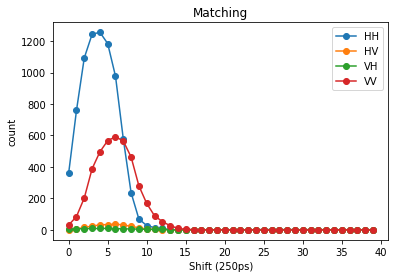

In [43]:
for i in range (2):
    for j in range (2):
        if(True):
            h = g2_heisto(astamps, achannel,bstamps, bchannel, amd=i, bmd=j,cwindow=750,search_steps=40,step_size_ps=250,search_direction=1)
            print ("detectors", detectors[i],detectors[j],"\tshiftsteps",h.index(max(h)),"\tcoincount",max(h))
            #if (i==j) 
            plt.plot(h, marker='o', label=detectors[i]+detectors[j])

plt.title("Matching")
plt.xlabel("Shift (250ps)")
plt.ylabel("count")
plt.legend()
plt.savefig("plots/Matching.jpg")
plt.show()

detectors H H 	shiftsteps 4 	coincount 698
detectors H V 	shiftsteps 4 	coincount 14
detectors V H 	shiftsteps 5 	coincount 7
detectors V V 	shiftsteps 5 	coincount 337


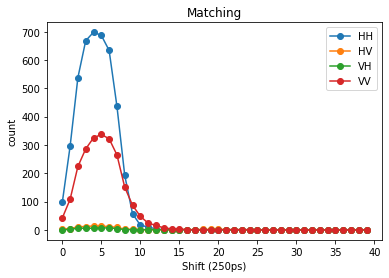

In [44]:
for i in range (2):
    for j in range (2):
        if(True):
            h = g2_heisto(astamps, achannel,cstamps, cchannel, amd=i, bmd=j,cwindow=750,search_steps=40,step_size_ps=250,search_direction=1)
            print ("detectors", detectors[i],detectors[j],"\tshiftsteps",h.index(max(h)),"\tcoincount",max(h))
            #if (i==j) 
            plt.plot(h, marker='o', label=detectors[i]+detectors[j])

plt.title("Matching")
plt.xlabel("Shift (250ps)")
plt.ylabel("count")
plt.legend()
plt.savefig("plots/Matching.jpg")
plt.show()

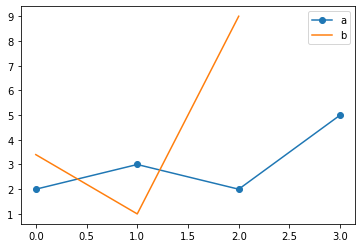

In [45]:
a = [2,3,2,5]
b = [3.4,1,9]

plt.plot(a,marker='o',label="a")
plt.plot(b,label='b')
plt.legend()
plt.show()

In [46]:
def correct_timestamp(stamps,detectors,step_size_ps=250,sH=0,sV=0):
    cstamp=[]
    ts = 0
    for (s,d) in zip (stamps,detectors):
        ts = s
        if(d==H): 
            ts+=sH*step_size_ps
        elif(d==V):
            ts+=sV*step_size_ps 
        cstamp.append(ts)
        
    print (step_size_ps*sH,step_size_ps*sV)
    
    return cstamp

In [47]:
#correct alice HV delay missmatch add 500ps to alice's V 
#astamps_corrected = correct_timestamp(astamps,achannel,sH=0,sV=-1*500,sA=0,sD=-2*500) #28 july data
#astamps_corrected = correct_timestamp(astamps,achannel,sH=0,sV=-2*500,sA=0,sD=-2*500) # 24 Aug data
#astamps_corrected = correct_timestamp(astamps,achannel,sH=0,sV=-2*500,sA=-3*500,sD=-1*500) # 23rd Oct data
#astamps_corrected = correct_timestamp(astamps,achannel,step_size_ps=250,sH=0,sV=-3,sA=-5,sD=-1) # 26rd Oct data
#astamps_corrected = correct_timestamp(astamps,achannel,step_size_ps=250,sH=0,sV=-3,sA=-6,sD=0) #23rd Oct new calibration
bstamps_corrected = correct_timestamp(bstamps,bchannel,step_size_ps=250,sH=0,sV=2)

0 500


4
[203, 388, 496, 567, 592, 565, 463, 280, 168, 90, 53, 27, 10, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0]


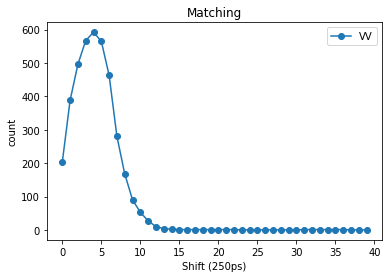

In [48]:
h = g2_heisto(astamps, achannel,bstamps_corrected, bchannel, amd=V, bmd=V,cwindow=750,search_steps=40,step_size_ps=250,search_direction=1)
            
print(h.index(max(h)))
print (h)
plt.plot(h, marker='o', label=detectors[i]+detectors[j])
#h.index(max(h))
plt.title("Matching")
plt.xlabel("Shift (250ps)")
plt.ylabel("count")
plt.legend()
#plt.savefig("plots/Matching.jpg")
plt.show()

In [49]:
#correct charlie
cstamps_corrected = correct_timestamp(cstamps,cchannel,step_size_ps=250,sH=0,sV=1)

0 250


4
[108, 224, 286, 325, 337, 322, 265, 151, 87, 48, 24, 16, 7, 4, 3, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2]


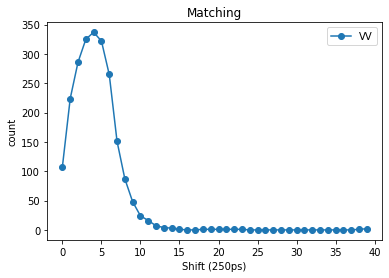

In [50]:
h = g2_heisto(astamps, achannel,cstamps_corrected, cchannel, amd=V, bmd=V,cwindow=750,search_steps=40,step_size_ps=250,search_direction=1)
            
print(h.index(max(h)))
print (h)
plt.plot(h, marker='o', label=detectors[i]+detectors[j])
#h.index(max(h))
plt.title("Matching")
plt.xlabel("Shift (250ps)")
plt.ylabel("count")
plt.legend()
#plt.savefig("plots/Matching.jpg")
plt.show()

In [51]:
# HH H(D) (D)D D(V) (V)V H(A) (A)A 
#h = g2_heisto(astamps_corrected, achannel,bstamps_corrected, bchannel, amd=A, bmd=A,cwindow=750,search_steps=40,step_size_ps = 250,search_direction=-1)
#print (h)
#print("shift =",h.index(max(h)))
#plt.title('cross correlation')
#plt.xlabel("shift (250ps)")
#plt.ylabel("counts")
#plt.plot(h,'-bo')


In [52]:
hh = {}

In [53]:
for i in range (2):
    for j in range (2):
        
        h = g2_heisto(astamps, achannel,bstamps_corrected, bchannel, amd=i, bmd=j,cwindow=750,search_steps=40,step_size_ps = 250,search_direction=1)
        hh[str(i)+str(j)] = h
        
        print ("detectors", detectors[i],detectors[j],"\tshiftsteps",h.index(max(h)),"\tcoincount",max(h))

detectors H H 	shiftsteps 4 	coincount 1256
detectors H V 	shiftsteps 4 	coincount 36
detectors V H 	shiftsteps 5 	coincount 10
detectors V V 	shiftsteps 4 	coincount 592


In [54]:
for i in range (2):
    for j in range (2):
        
        h = g2_heisto(astamps, achannel,cstamps_corrected, cchannel, amd=i, bmd=j,cwindow=750,search_steps=40,step_size_ps = 250,search_direction=1)
        hh[str(i)+str(j)] = h
        
        print ("detectors", detectors[i],detectors[j],"\tshiftsteps",h.index(max(h)),"\tcoincount",max(h))

detectors H H 	shiftsteps 4 	coincount 698
detectors H V 	shiftsteps 3 	coincount 14
detectors V H 	shiftsteps 5 	coincount 7
detectors V V 	shiftsteps 4 	coincount 337


In [55]:
#h = g2_heisto(astamps_corrected, achannel,bstamps_corrected, bchannel, amd=D, bmd=D,cwindow=500,search_steps=20,search_direction=-1)
#print (h)
#h.index(max(h))

In [75]:
def match_coincidence(at,ad,bt,bd,cwindow,shift):
    ia = 0
    ib = 0
    acoin_indexes = []
    bcoin_indexes = []
    while (ia<len(at) and ib <len(bt)):
        
        diff = bt[ib]- at[ia] + shift

        if (abs(diff)<=cwindow):
            #coin_count +=1
            if ad[ia]==bd[ib]:
                acoin_indexes.append(ia)
                bcoin_indexes.append(ib)
            ia+=1
            ib+=1
            #continue
        elif (diff>cwindow):
            ia+=1
            #continue
        elif( diff <-cwindow):
            ib+=1
            #continue
        else:
            print ("ERROR! I should not be here")
            break
    return acoin_indexes,bcoin_indexes



In [76]:
ab_indexes,bc_indexes = match_coincidence(astamps,achannel,bstamps_corrected,bchannel,750,4*250)

In [77]:
len(ab_indexes)



1848

In [78]:
1256 + 592

1848

In [80]:
ac_indexes,cc_indexes = match_coincidence(astamps,achannel,cstamps_corrected,cchannel,750,4*250)

In [98]:
def generate_tripartite_output(ab_indexes,ac_indexes,astamps,achannel):
    columnA=[]
    columnB=[]
    columnC=[]
    ib=0
    ic=0
    tag_ib=None
    tag_ic=None
    a=0
    b=0
    c=0
    while(ib < len(ab_indexes) and ic <len(ac_indexes)):
        tag_ib = ab_indexes[ib]
        tag_ic = ac_indexes[ic]
        
        if tag_ib < tag_ic: 
            #process tag_ib
            bit= achannel[tag_ib]
            a = 0
            b = bit
            c = bit
            ib+=1
        elif tag_ib > tag_ic:
            #process gat_ic
            bit = achannel[tag_ic]
            a = 1
            b = bit
            c = 1-bit
            ic +=1
        else:
            ib+=1
            ic+=1
        columnA.append(a)
        columnB.append(b)
        columnC.append(c)
    
    return columnA,columnB,columnC
    

In [103]:
A,B,C=generate_tripartite_output(ab_indexes,ac_indexes,astamps,achannel)


In [100]:
A[:20]

[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]

In [101]:
B[:20]

[0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0]

In [102]:
C[:20]

[0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1]

In [106]:
df = pd.DataFrame()
df['columnA'] = A
df['columnB'] = B
df['columnC'] = C
df.to_csv("PQRNG_output.csv",index=False)


In [168]:
def hex_from_bitmap(ap,bp):
    h=0
    for i in ap: 
        h<<=1
        h= h|i
    for i in bp: 
        h<<=1
        h= h|i    
    #print (hex(h) )
    return h
    
hex_from_bitmap([0,0,1,0],[0,0,1,0])

34

In [169]:
h = 1
h<<=2

h

4

In [170]:
def match_multi_coincidences(at,ad,bt,bd,cwindow,shift):
    ia = 0
    ib = 0
    acoin_indexes = []
    bcoin_indexes = []
    coin_events =[]
    count_Atype=0
    count_Btype=0
    while (ia<len(at) and ib <len(bt)):
        
        diff = bt[ib]- at[ia] + shift

        if (abs(diff)<=cwindow):
            acoin_indexes.append(ia)
            bcoin_indexes.append(ib)
            
            ap = [0,0,0,0]
            bp= [0,0,0,0]
            #coin_count +=1
            
            #multi_coincidence_logic 
            ap[ad[ia]-1]=1
            bp[bd[ib]-1]=1
            c_root = at[ia]
            #find alice's muilti events
            for i in range(3):
                ia+=1
                if (ia>=len(at)): 
                    break 
                if (at[ia] - c_root)>cwindow:
                    break
                ap[ad[ia]-1]=1
                #print("found A type")
                count_Atype+=1
                #break
            
            #find bob's multi events
            for i in range(3):
                ib+=1
                if (ib>=len(at)): 
                    break
                diff_m = bt[ib]- c_root + shift
                
                if abs(diff_m)>cwindow:
                    break
                bp[bd[ib]-1]=1
                
                #print("found B type")
                count_Btype+=1
                
                
            
            #ia+=1
            #ib+=1
            #continue
            event = hex_from_bitmap(ap,bp)
            coin_events.append(event)
        elif (diff>cwindow):
            ia+=1
            #continue
        elif( diff <-cwindow):
            ib+=1
            #continue
        else:
            print ("ERROR! I should not be here")
            break
    print ("atype",count_Atype,"btype",count_Btype)
    return acoin_indexes,bcoin_indexes, coin_events
ac_indexes,bc_indexes,coin_events = match_multi_coincidences(astamps_corrected,achannel,bstamps_corrected,bchannel,1500,-7500)
print (len(ac_indexes),len(bc_indexes),len(coin_events) )

NameError: name 'astamps_corrected' is not defined

['1', '2']


In [58]:
i = 1
j = 0
print(astamps_corrected[i], bstamps_corrected[j])
print("diff",bstamps_corrected[j]-astamps_corrected[i]-13*500 )

1231127257818 1231127265907
diff 1589


In [59]:
len(ac_indexes)

12435

In [60]:
bc_indexes[0]


0

In [61]:
bstamps_corrected[1]- astamps_corrected[1] - 6500

484234

In [ ]:
print(astamps_corrected[51],bstamps_corrected[76], bstamps_corrected[76] - astamps_corrected[51]-9*500)

In [ ]:
basis_count = 0
error_count = 0
for (a,b) in zip(ac_indexes,bc_indexes):
    da = achannel[a]
    db = bchannel[b]
    if (da >= 3 and db >= 3):
        #basis HV
        #print(da,db)
        basis_count+=1
        if (da!=db):
            error_count+=1
    if( da<3 and db <3):
        #print (da,db)
        if(da!=db):
            error_count+=1
        basis_count+=1

In [ ]:
basis_count

In [ ]:
error_count

In [ ]:
QBER = error_count / basis_count
QBER*100

In [ ]:
astamps_corrected[0:10]

In [ ]:
bstamps_corrected[0:10]

In [ ]:
len (ac_indexes) / len(astamps_corrected)

In [ ]:
duration = astamps[-1]-astamps[0]
duration / (10**12)

In [ ]:
len(astamps)/10

Singles rate 3.4 Million/s
coincidence rate 333 K/s 
QBER = 3.7 %
coincidence window 500 ps

for coincidence window of 1 ns QBER is around 4.2 %
